In [19]:
# Importo librerías que voy a usar.

import pymongo
from pymongo import MongoClient
client = MongoClient ('localhost', 27017)
db = client['companies']

import pandas as pd

from IPython.display import Image

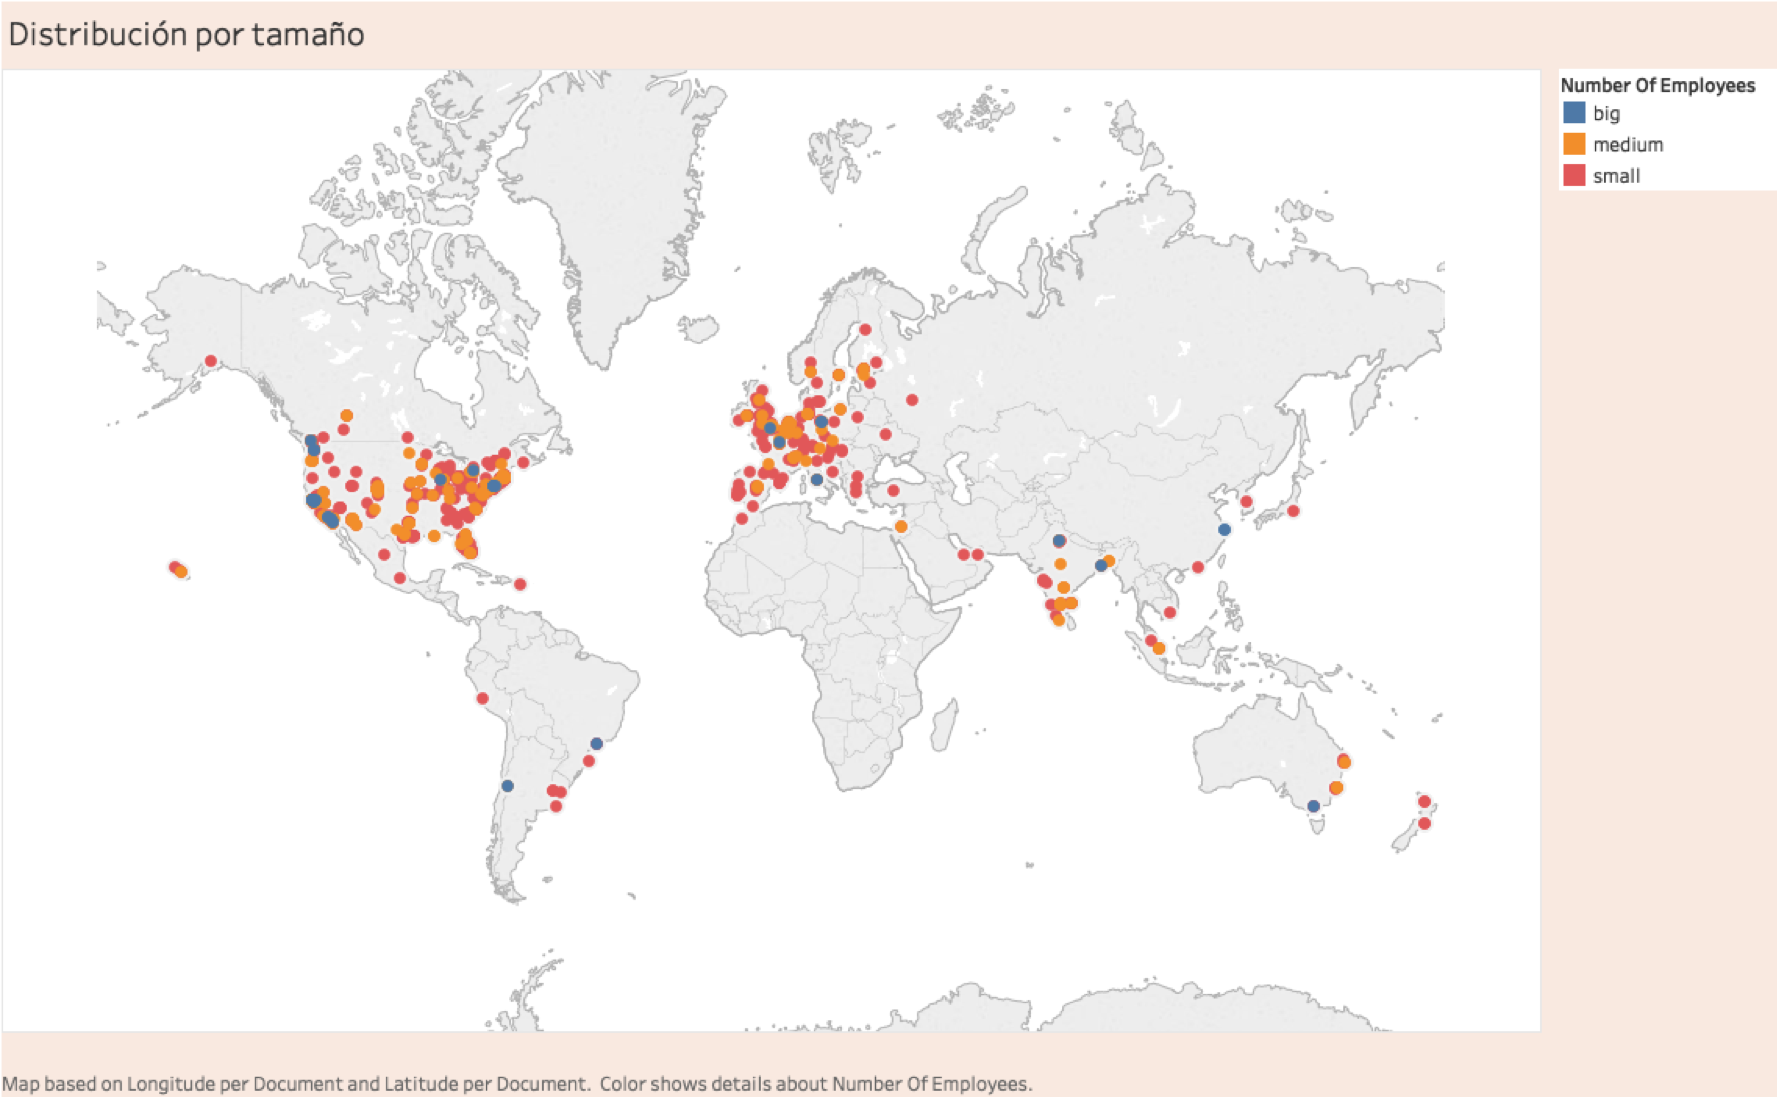

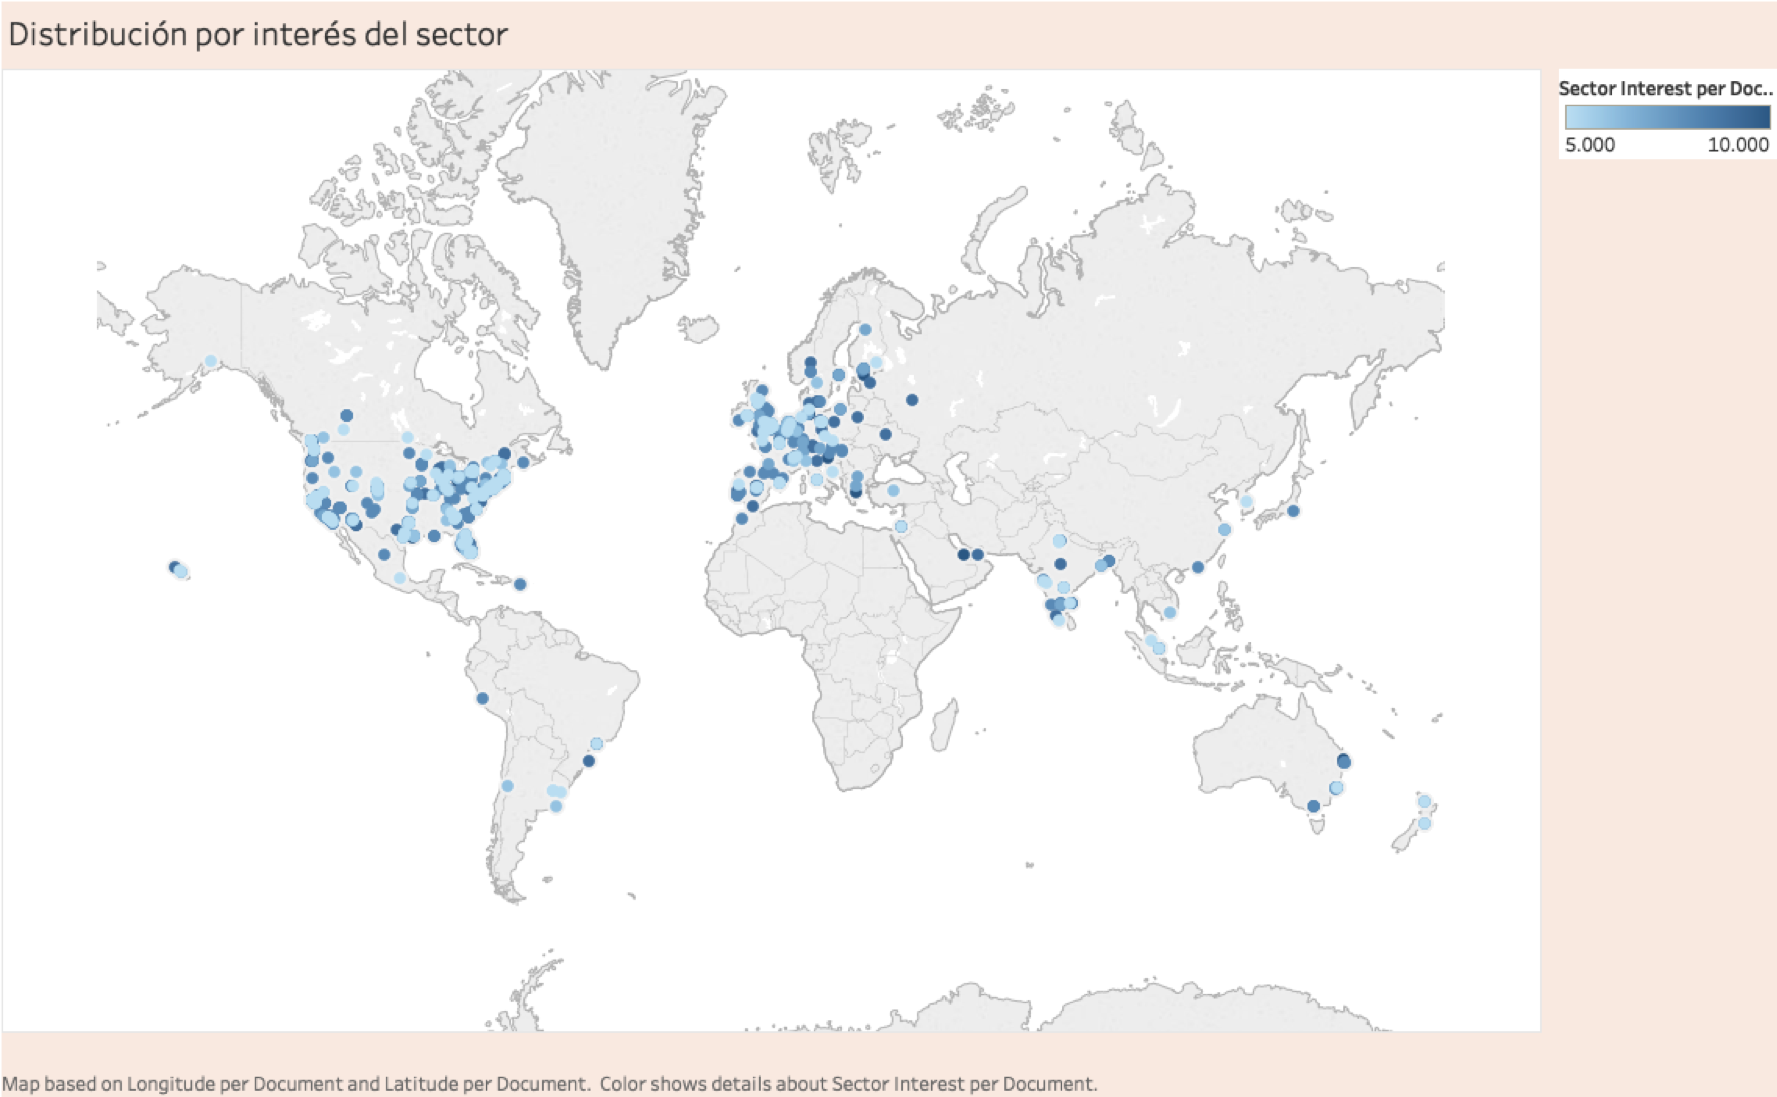

In [20]:
# Esta es la distribución de las empresas con las que me he quedado en el dataframe limpio

display(Image("tamaño_mundial.png"), Image("sector_mundial.png"))

#### Como se puede observar, la mayoría de empresas que interesan están concentradas en Europa y las costas de EEUU.

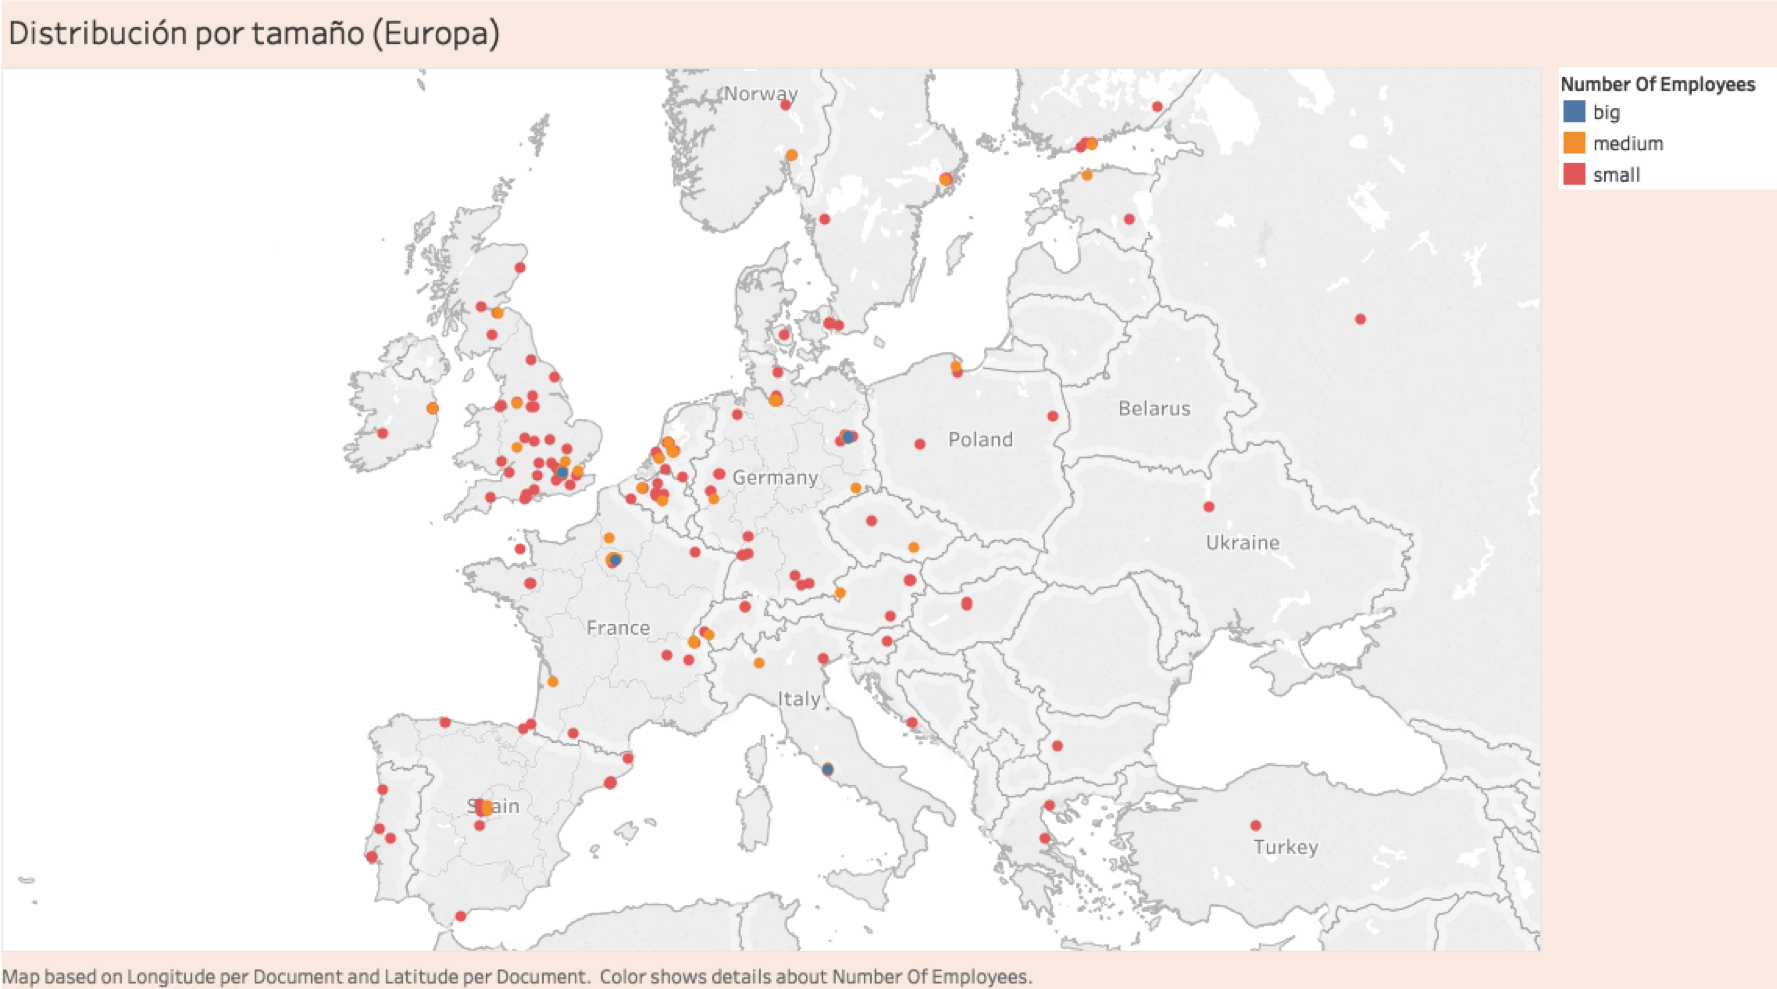

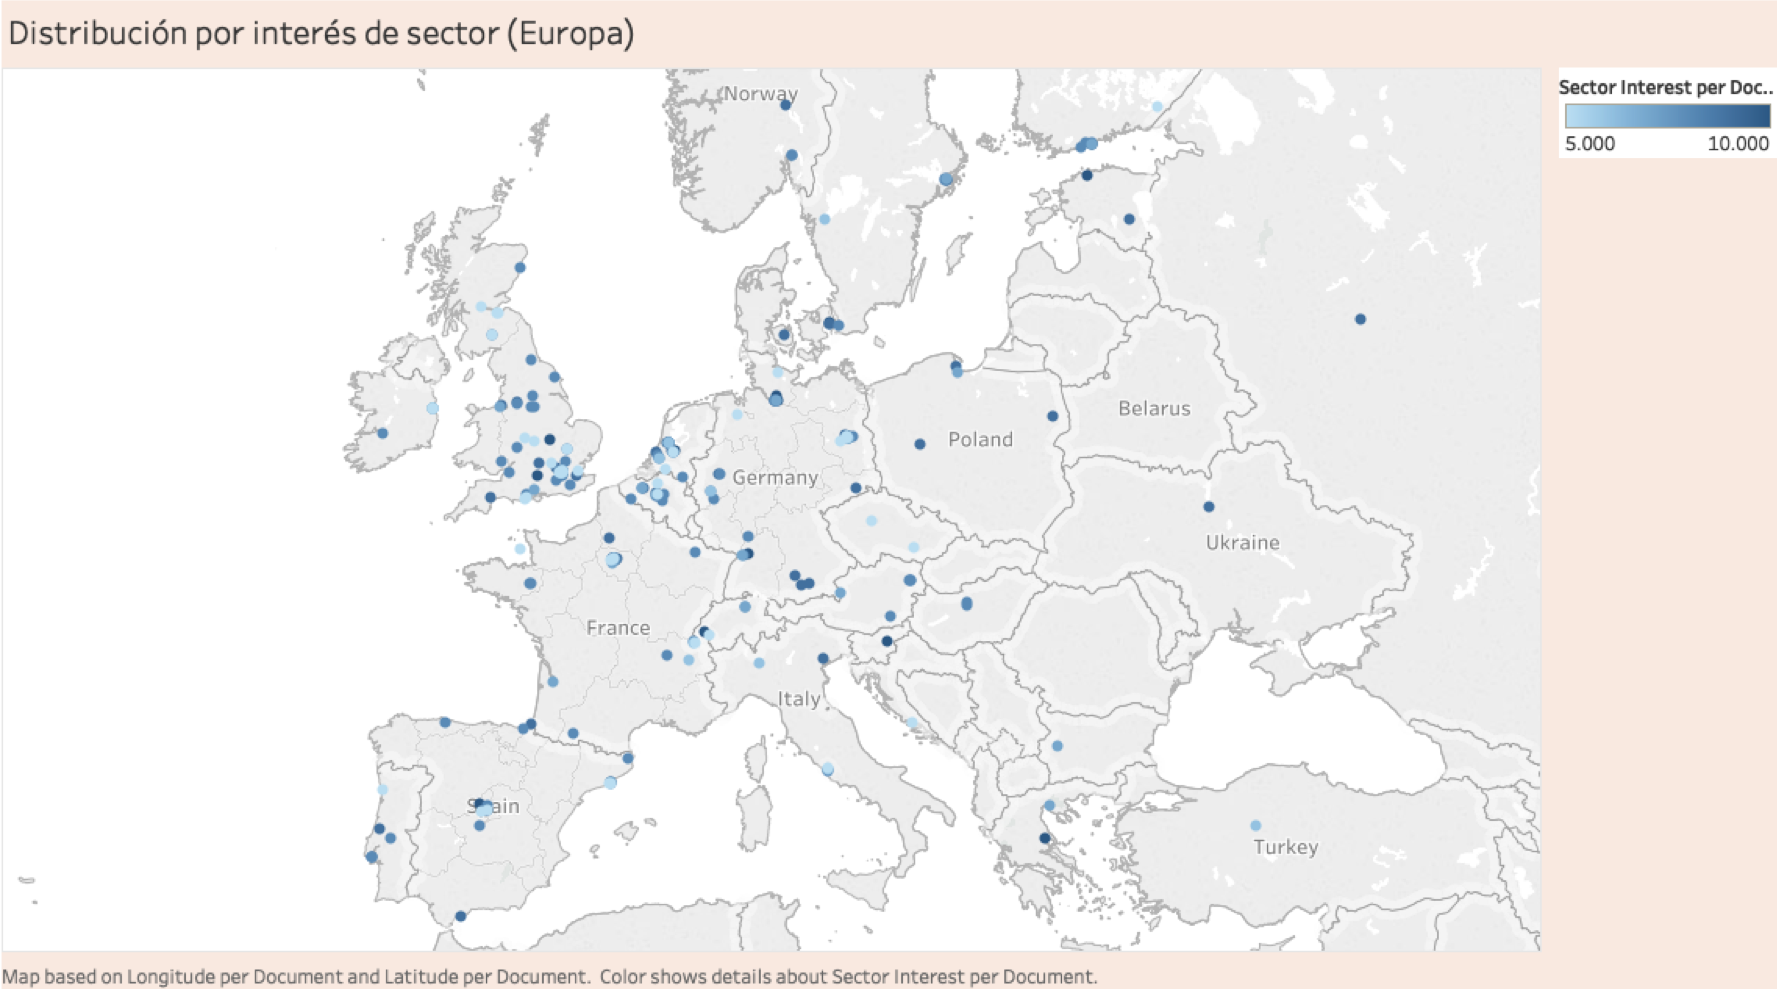

In [21]:
display(Image("tamaño_eur.png"), Image("sector_eur.png"))

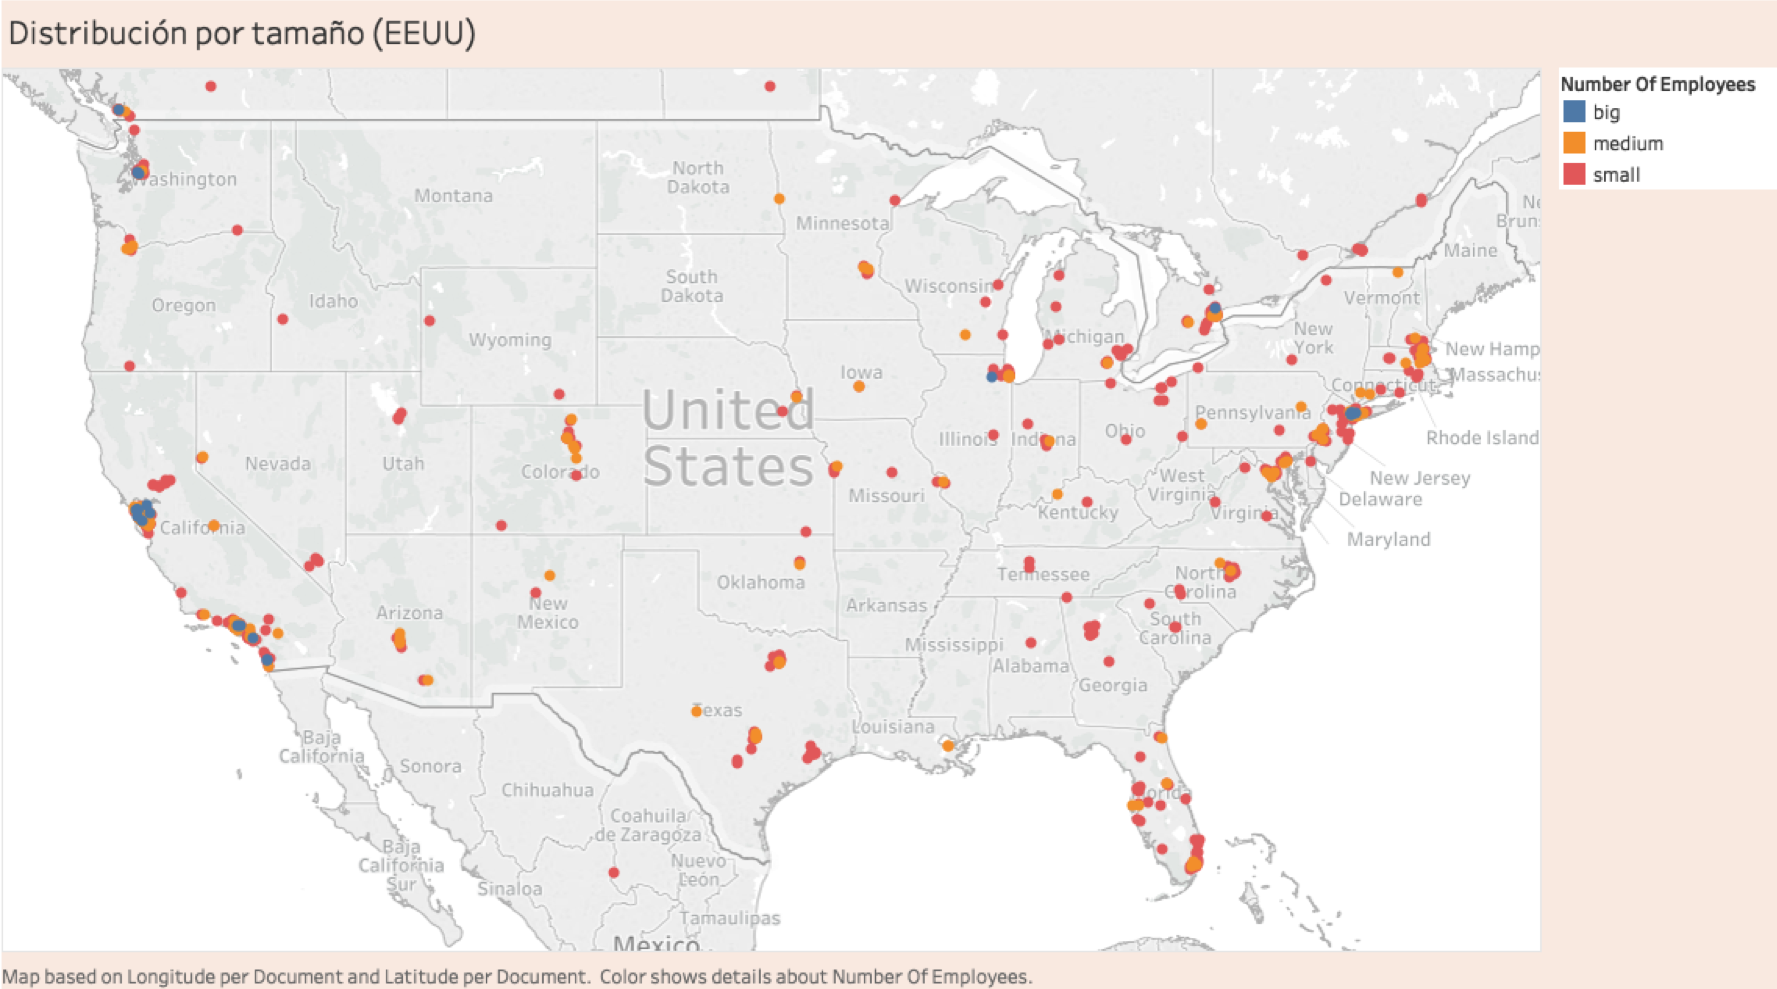

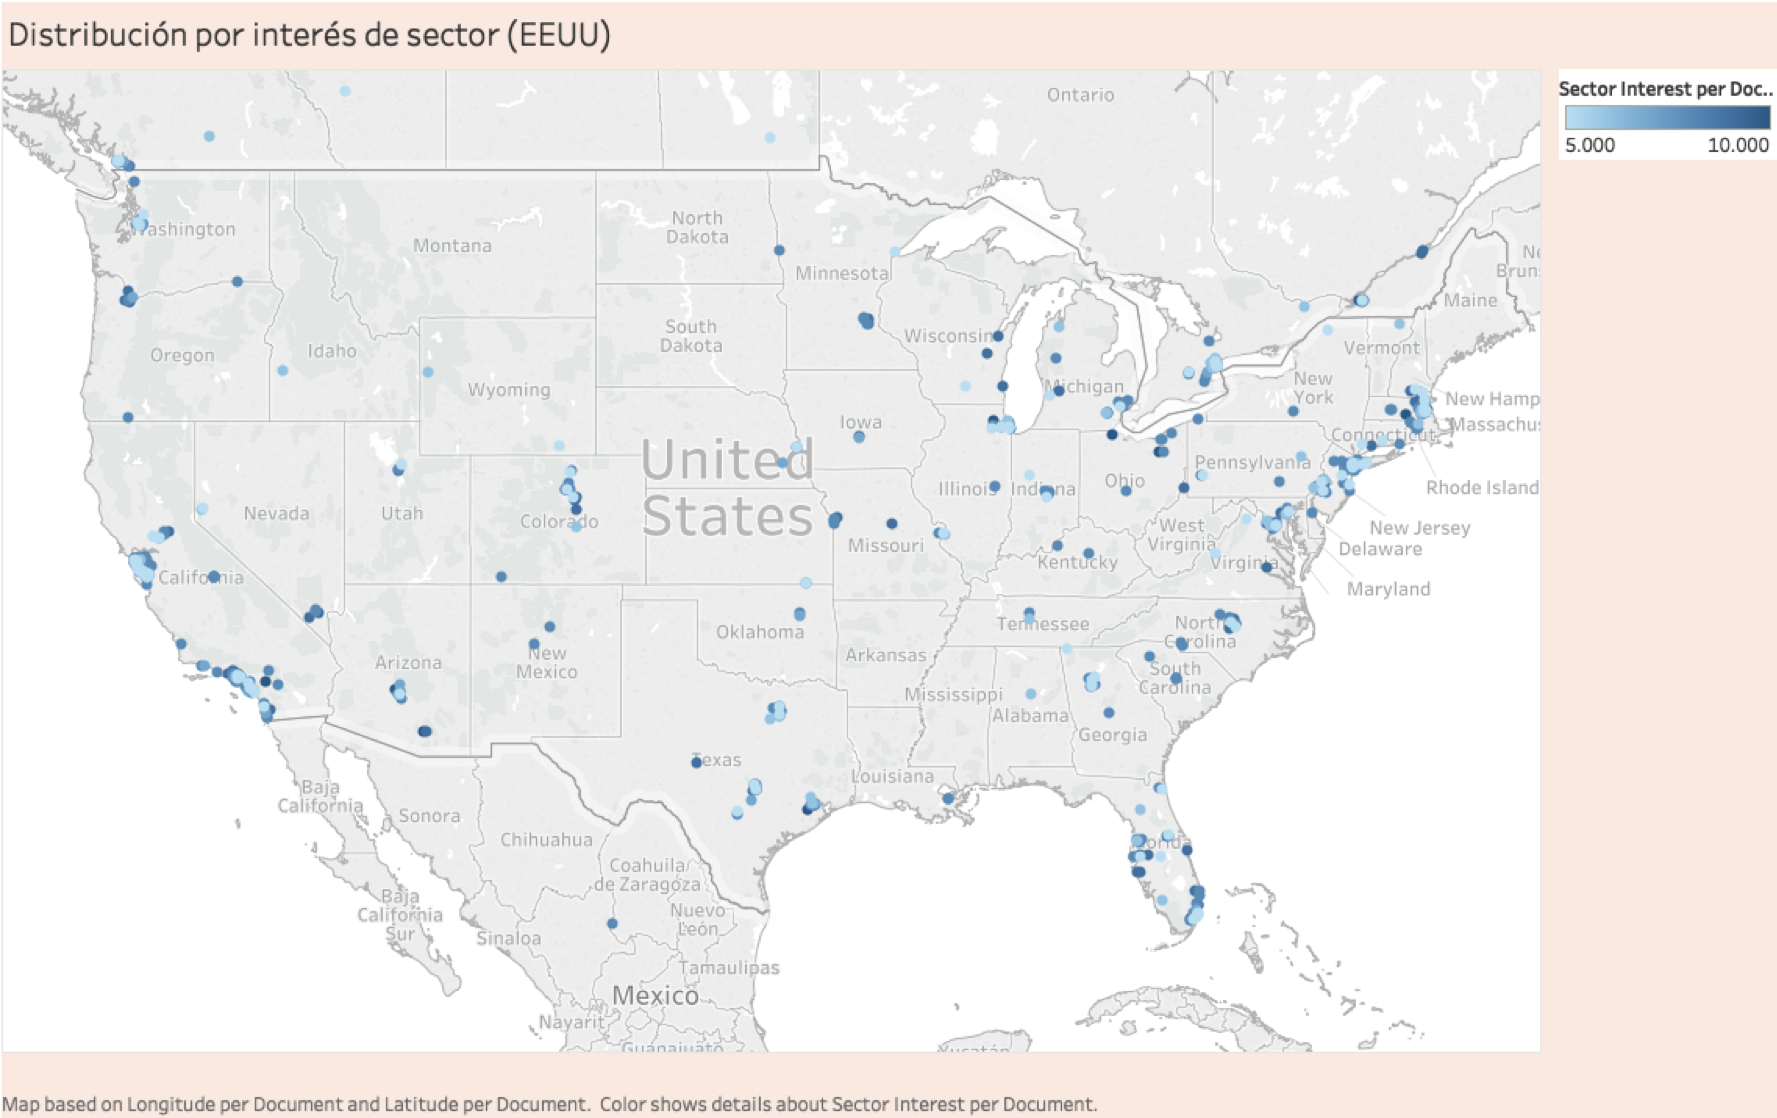

In [22]:
display(Image("tamaño_eeuu.png"), Image("sector_eeuu.png"))

In [23]:
mydatabase = db.geospatial_clean.find()

In [24]:
mydataframec = pd.DataFrame(list(mydatabase))

mydataframec.head()

_id category_code               coordenadas  \
0  5cd5a5da55026b21430174a7      software  [-122.392142, 37.782263]   
1  5cd5a5da55026b21430174a8    enterprise     [-71.05781, 42.35892]   
2  5cd5a5da55026b21430174a9   games_video  [-122.151158, 47.597965]   
3  5cd5a5da55026b21430174aa   games_video  [-122.393229, 37.781265]   
4  5cd5a5da55026b21430174ab        search   [-73.985506, 40.757929]   

                                 coordinates_latlong  \
0  {'type': 'Point', 'coordinates': [37.782263, -...   
1  {'type': 'Point', 'coordinates': [42.35892, -7...   
2  {'type': 'Point', 'coordinates': [47.597965, -...   
3  {'type': 'Point', 'coordinates': [37.781265, -...   
4  {'type': 'Point', 'coordinates': [40.757929, -...   

                                 coordinates_longlat country_code  \
0  {'type': 'Point', 'coordinates': [-122.392142,...          USA   
1  {'type': 'Point', 'coordinates': [-71.05781, 4...          USA   
2  {'type': 'Point', 'coordinates': [-122.151158,...          USA   
3  {'type': 'Point', 'coordinates': [-122.393229,...          USA   
4  {'type': 'Point', 'coordinates': [-73.985506, ...          USA   

   founded_year   latitude   longitude  money_raised_eur         name  \
0          2008  37.782263 -122.392142          8.014248      GoingOn   
1          2008  42.358920  -71.057810         16.028495     Cloudant   
2          2008  47.597965 -122.151158          0.000000      YouBeQB   
3          2008  37.781265 -122.393229          4.452360  Crunchyroll   
4          2012  40.757929  -73.985506          1.780944      PeekYou   

  number_of_employees  sector_interest  
0              medium              9.0  
1              medium              5.0  
2               small             10.0  
3              medium             10.0  
4              medium              5.0

In [25]:
nearLocation = {
    "lng": 40.717432,
    "lat": -73.994943
}

mycompanies = pd.DataFrame(db.geospatial_clean.find({
    "coordinates_longlat": {
     "$near": {
       "$geometry": {
          "type": "Point" ,
          "coordinates_longlat": [ nearLocation["lat"] , nearLocation["lng"] ]
       },
       "$maxDistance": 2000, # In meters
     }
   }
}))
mycompanies.head()

OperationFailure: invalid point in geo near query $geometry argument: { type: "Point", coordinates_longlat: [ -73.99494300000001, 40.717432 ] }  Point must be an array or object

In [77]:
# nearLocation = {"lng": 40.717432, "lat": -73.994943}

mycompanies = pd.DataFrame(db.geospatial_clean.find({"coordenadas":
                                                     {"$near": {"number_of_employees": "big"},
                                                      "$maxDistance": 1/111.12}}))

OperationFailure: geo near accepts just one argument when querying for a GeoJSON point. Extra field found: $maxDistance: 500000

In [68]:
mycompanies.head()

_id category_code                coordenadas  \
0  5cd43ae5a6cd26170854becd          news    [-73.996876, 40.724604]   
1  5cd43ae5a6cd26170854be61     ecommerce    [-74.004602, 40.718177]   
2  5cd43ae5a6cd26170854bc0c           web    [-74.007072, 40.714521]   
3  5cd43ae5a6cd26170854bed9   advertising    [-73.994797, 40.727216]   
4  5cd43ae5a6cd26170854bf56           web  [-73.9893359, 40.7277434]   

                                 coordinates_latlong  \
0  {'type': 'Point', 'coordinates': [40.724604, -...   
1  {'type': 'Point', 'coordinates': [40.718177, -...   
2  {'type': 'Point', 'coordinates': [40.714521, -...   
3  {'type': 'Point', 'coordinates': [40.727216, -...   
4  {'type': 'Point', 'coordinates': [40.7277434, ...   

                                 coordinates_longlat country_code  \
0  {'type': 'Point', 'coordinates': [-73.996876, ...          USA   
1  {'type': 'Point', 'coordinates': [-74.004602, ...          USA   
2  {'type': 'Point', 'coordinates': [-74.007072, ...          USA   
3  {'type': 'Point', 'coordinates': [-73.994797, ...          USA   
4  {'type': 'Point', 'coordinates': [-73.9893359,...          USA   

   founded_year   latitude  longitude           name number_of_employees  \
0          2008  40.724604 -73.996876          Patch               small   
1          2008  40.718177 -74.004602  Digital Bloom               small   
2          2008  40.714521 -74.007072       Strateer               small   
3          2009  40.727216 -73.994797     Simulmedia               small   
4          2008  40.727743 -73.989336         TrialX               small   

  total_money_raised  
0                 $0  
1                 $0  
2                 $0  
3             $57.3M  
4                 $0